# Imports

In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Carregando os Dados

In [29]:
df = pd.read_csv('Data\\train.csv')

In [30]:
df.head()

,feature_1,feature_2,feature_3,feature_4,target
0,8.96,23.04,320.40,150348.75,1
1,7.14,23.76,121.04,50116.25,0
2,8.40,19.44,363.12,160372.00,1
3,8.12,19.44,363.12,190441.75,2
4,7.56,21.60,320.40,150348.75,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   feature_1  105 non-null    float64
 1   feature_2  105 non-null    float64
 2   feature_3  105 non-null    float64
 3   feature_4  105 non-null    float64
 4   target     105 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.2 KB


In [32]:
df.describe()

,feature_1,feature_2,feature_3,feature_4,target
count,105.000000,105.000000,105.000000,105.000000,105.000000
mean,8.200000,22.093714,272.458667,122188.190476,1.028571
std,1.107454,3.033930,123.851587,75764.398119,0.814025
min,6.020000,14.400000,78.320000,10023.250000,0.000000
25%,7.140000,20.160000,113.920000,30069.750000,0.000000
50%,8.120000,21.600000,313.280000,130302.250000,1.000000
75%,8.960000,23.760000,363.120000,180418.500000,2.000000
max,11.060000,30.240000,477.040000,250581.250000,2.000000


In [33]:
#sns.pairplot(df, hue='target', palette='rainbow')

# Tratando os dados

In [34]:
X = df.drop('target', axis=1)
y = df['target']

In [35]:
from sklearn.preprocessing import StandardScaler

In [36]:
ss = StandardScaler()

In [37]:
X = ss.fit_transform(X)

# Separando Treino Teste

In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Avaliando modelos

In [40]:
from Modelos.KNearestNeighbor import KNearestNeighbor
from Modelos.NaiveBayes import NaiveBayes

In [41]:
error_rate = []
for neighbors in range(1, 40, 2):
    knn = KNearestNeighbor(neighbors=neighbors)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean(pred!=y_test))

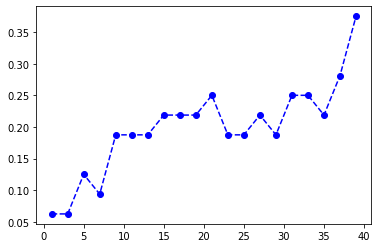

In [42]:
plt.plot(range(1, 40, 2), error_rate, color='blue', linestyle='dashed', marker='o')

In [43]:
# KNN forca bruta
KNN_BruFor = KNearestNeighbor(neighbors=3)

# KNN KDtree (1 vizinho)
KNN_KDTree = KNearestNeighbor(policy='KDTree')

# Naive Bayes
NB = NaiveBayes()

In [44]:
KNN_BruFor.fit(X_train, y_train)
KNN_KDTree.fit(X_train, y_train)
NB.fit(X_train, y_train)

# Comparando Desempenho

In [45]:
from sklearn.metrics import classification_report

In [46]:
BruFor_pred = KNN_BruFor.predict(X_test)
KDTree_pred = KNN_KDTree.predict(X_test)
NB_pred = NB.predict(X_test)

In [47]:
print('KNN forca Bruta: ')
print(classification_report(BruFor_pred, y_test))

KNN forca Bruta: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.83      0.91        12
           2       0.87      1.00      0.93        13

    accuracy                           0.94        32
   macro avg       0.96      0.94      0.95        32
weighted avg       0.95      0.94      0.94        32



In [48]:
print('KNN KDTree: ')
print(classification_report(KDTree_pred, y_test))

KNN KDTree: 
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         7
         1.0       0.90      0.90      0.90        10
         2.0       0.93      0.93      0.93        15

    accuracy                           0.94        32
   macro avg       0.94      0.94      0.94        32
weighted avg       0.94      0.94      0.94        32



In [49]:
print('Naive Bayes: ')
print(classification_report(NB_pred, y_test))

Naive Bayes: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         7
           1       1.00      0.91      0.95        11
           2       0.93      1.00      0.97        14

    accuracy                           0.97        32
   macro avg       0.98      0.97      0.97        32
weighted avg       0.97      0.97      0.97        32



# Naive Bayes teve a melhor performance
- vamos treinalo com todos os dado para fazer as nossas previsoes

In [50]:
test = pd.read_csv('Data\\test.csv')
test = ss.transform(test)

In [51]:
full_NB = NaiveBayes()
full_NB.fit(X, y)

In [52]:
pred = full_NB.predict(test)

In [53]:
output = pd.DataFrame(pred)

In [54]:
output.to_csv('Output\\NaiveBayes_Predictions.csv', index=False)